In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import requests
from functools import reduce

# Data retrieval from API

In [154]:
response = requests.get("http://localhost:8080/api/images/")

In [155]:
print(response.json())

[{'_id': '61a65b9069add03e09e1e7df', 'type': 0, 'evaluations_list': [{'evaluation': 2}, {'evaluation': 4}, {'evaluation': 3}]}, {'_id': '61a65f2e69add03e09e1e7e1', 'type': 1, 'evaluations_list': [{'evaluation': 7}, {'evaluation': 4}, {'evaluation': 1}]}, {'_id': '61a65f3669add03e09e1e7e2', 'type': 1, 'evaluations_list': [{'evaluation': 3}, {'evaluation': 4}, {'evaluation': 4}, {'evaluation': 3}]}, {'_id': '61a899b5a99916d2901b7813', 'type': 0, 'evaluations_list': [{'evaluation': 6}, {'evaluation': 4}, {'evaluation': 5}]}, {'_id': '61a899c7a99916d2901b7814', 'type': 0, 'evaluations_list': [{'evaluation': 4}, {'evaluation': 6}, {'evaluation': 4}, {'evaluation': 4}]}, {'_id': '61a899daa99916d2901b7815', 'type': 0, 'evaluations_list': [{'evaluation': 4}, {'evaluation': 4}, {'evaluation': 4}, {'evaluation': 5}]}, {'_id': '61a899eba99916d2901b7816', 'type': 0, 'evaluations_list': [{'evaluation': 4}, {'evaluation': 4}, {'evaluation': 4}]}, {'_id': '61a899ffa99916d2901b7817', 'type': 0, 'evalu

In [156]:
# transform data retrieved in pandas dataframe
dataframe = pd.json_normalize(response.json(), ['evaluations_list'],  meta=[
    '_id',
    'type',
])
dataframe.info()
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   evaluation  248 non-null    int64 
 1   _id         248 non-null    object
 2   type        248 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


,evaluation,_id,type
0,2,61a65b9069add03e09e1e7df,0
1,4,61a65b9069add03e09e1e7df,0
2,3,61a65b9069add03e09e1e7df,0
3,7,61a65f2e69add03e09e1e7e1,1
4,4,61a65f2e69add03e09e1e7e1,1
...,...,...,...
243,4,61a8a03fa99916d2901b784b,1
244,3,61a8a03fa99916d2901b784b,1
245,4,61a8a03fa99916d2901b784b,1
246,4,61a8a03fa99916d2901b784b,1


# Distribution of votes

In [161]:
real = dataframe.loc[dataframe['type'] == 0].groupby(['evaluation']).size().reset_index(name='counts_real')
fake = dataframe.loc[dataframe['type'] == 1].groupby(['evaluation']).size().reset_index(name='counts_gen')
print(real)
print(fake)

   evaluation  counts_real
0           1            1
1           2            7
2           3            8
3           4           89
4           5           10
5           6            9
6           7            4
   evaluation  counts_gen
0           1           1
1           2           8
2           3          11
3           4          81
4           5           7
5           6           8
6           7           4


In [162]:
evaluations = reduce(lambda left,right: pd.merge(left,right,on='evaluation',  how='outer'), [real, fake])
evaluations = evaluations.fillna(0)
evaluations['counts_gen'] = evaluations['counts_gen'].astype('int')
evaluations

,evaluation,counts_real,counts_gen
0,1,1,1
1,2,7,8
2,3,8,11
3,4,89,81
4,5,10,7
5,6,9,8
6,7,4,4


In [163]:
totGen = evaluations['counts_gen'].sum()
totReal = evaluations['counts_real'].sum()
print(totGen)
print(totReal)
evaluations['counts_gen'] = evaluations['counts_gen'].div(totGen).mul(100)
evaluations['counts_real'] = evaluations['counts_real'].div(totReal).mul(100)
#evaluations

120
128


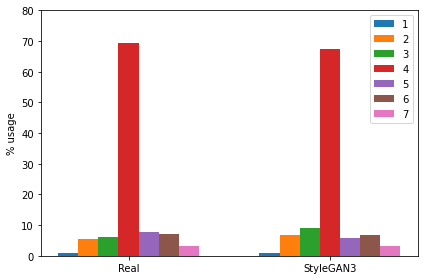

In [171]:
eval_1 = evaluations.loc[evaluations['evaluation'] == 1][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_2 = evaluations.loc[evaluations['evaluation'] == 2][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_3 = evaluations.loc[evaluations['evaluation'] == 3][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_4 = evaluations.loc[evaluations['evaluation'] == 4][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_5 = evaluations.loc[evaluations['evaluation'] == 5][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_6 = evaluations.loc[evaluations['evaluation'] == 6][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_7 = evaluations.loc[evaluations['evaluation'] == 7][['counts_real', 'counts_gen']].values.flatten().tolist()

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.3, eval_1, width, label='1')
rects2 = ax.bar(x-0.2, eval_2, width, label='2')
rects3 = ax.bar(x-0.1, eval_3, width, label='3')
rects4 = ax.bar(x, eval_4, width, label='4')
rects5 = ax.bar(x+0.1, eval_5, width, label='5')
rects6 = ax.bar(x+0.2, eval_6, width, label='6')
rects7 = ax.bar(x+0.3, eval_7, width, label='7')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% usage')
ax.set_title('')
ax.legend()
plt.ylim(0,80)
plt.xticks(x, ['Real', 'StyleGAN3'])


fig.tight_layout()


# Realism rate calculation

In [165]:
realismReal = dataframe.loc[(dataframe['type'] == 0) & (dataframe['evaluation'] <= 3)].count()
totalReal = dataframe.loc[dataframe['type'] == 0].count()
realismReal = realismReal['_id']
print(realismReal)
totalReal = totalReal['_id']
print(totalReal)
realismRealPerc = (realismReal/totalReal)*100
realismRealPerc

16
128


12.5

In [166]:
realismGen = dataframe.loc[(dataframe['type'] == 1) & (dataframe['evaluation'] <= 3)].count()
totalGen = dataframe.loc[dataframe['type'] == 1].count()
realismGen = realismGen['_id']
print(realismGen)
totalGen = totalGen['_id']
print(totalGen)
realismGenPerc = (realismGen/totalGen)*100
realismGenPerc

20
120


16.666666666666664

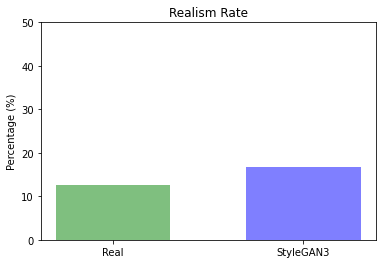

In [177]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [realismRealPerc, realismGenPerc]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 50)
plt.title('Realism Rate')

plt.show()

# Accuracy

In [198]:
numEvalImages = dataframe.groupby(['_id','type']).size().reset_index(name='numEval')
print(numEvalImages)
numCorrectEvalReal = dataframe.loc[(dataframe['type'] == 0) & (dataframe['evaluation'] <= 3)].groupby(['_id']).size().reset_index(name='numCorrect')
print(numCorrectEvalReal)
numCorrectEvalGen = dataframe.loc[(dataframe['type'] == 1) & (dataframe['evaluation'] >= 5)].groupby(['_id']).size().reset_index(name='numCorrect')
print(numCorrectEvalGen)

                         _id  type  numEval
0   61a65b9069add03e09e1e7df     0        3
1   61a65f2e69add03e09e1e7e1     1        3
2   61a65f3669add03e09e1e7e2     1        4
3   61a899b5a99916d2901b7813     0        3
4   61a899c7a99916d2901b7814     0        4
5   61a899daa99916d2901b7815     0        4
6   61a899eba99916d2901b7816     0        3
7   61a899ffa99916d2901b7817     0        5
8   61a89a1aa99916d2901b7818     0        5
9   61a89a29a99916d2901b7819     0        4
10  61a89a39a99916d2901b781a     0        3
11  61a89a69a99916d2901b781b     0        3
12  61a89a76a99916d2901b781c     0        4
13  61a89a84a99916d2901b781d     0        4
14  61a89a8fa99916d2901b781e     0        4
15  61a89a9da99916d2901b781f     0        6
16  61a89aa7a99916d2901b7820     0        5
17  61a89bbfa99916d2901b7821     0        4
18  61a89bc9a99916d2901b7822     0        5
19  61a89bd7a99916d2901b7823     0        4
20  61a89be3a99916d2901b7824     0        5
21  61a89bf9a99916d2901b7825    

In [199]:
correct = pd.concat([numCorrectEvalReal, numCorrectEvalGen])
#correct
acc = reduce(lambda left,right: pd.merge(left,right,on='_id',  how='outer'), [numEvalImages, correct])
acc = acc.fillna(0)
acc['numCorrect'] = acc['numCorrect'].astype('int')
acc

,_id,type,numEval,numCorrect
0,61a65b9069add03e09e1e7df,0,3,2
1,61a65f2e69add03e09e1e7e1,1,3,1
2,61a65f3669add03e09e1e7e2,1,4,0
3,61a899b5a99916d2901b7813,0,3,0
4,61a899c7a99916d2901b7814,0,4,0
5,61a899daa99916d2901b7815,0,4,0
6,61a899eba99916d2901b7816,0,3,0
7,61a899ffa99916d2901b7817,0,5,1
8,61a89a1aa99916d2901b7818,0,5,0
9,61a89a29a99916d2901b7819,0,4,1


In [207]:
acc['acc'] = acc['numCorrect'].div(acc['numEval'])
print(acc)
meanAccReal = acc.loc[dataframe['type'] == 0][['acc']].mean().mul(100)
meanAccReal = meanAccReal['acc']
print(meanAccReal)
meanAccGen = acc.loc[dataframe['type'] == 1][['acc']].mean().mul(100)
meanAccGen = meanAccGen['acc']
print(meanAccGen)


                         _id  type  numEval  numCorrect       acc
0   61a65b9069add03e09e1e7df     0        3           2  0.666667
1   61a65f2e69add03e09e1e7e1     1        3           1  0.333333
2   61a65f3669add03e09e1e7e2     1        4           0  0.000000
3   61a899b5a99916d2901b7813     0        3           0  0.000000
4   61a899c7a99916d2901b7814     0        4           0  0.000000
5   61a899daa99916d2901b7815     0        4           0  0.000000
6   61a899eba99916d2901b7816     0        3           0  0.000000
7   61a899ffa99916d2901b7817     0        5           1  0.200000
8   61a89a1aa99916d2901b7818     0        5           0  0.000000
9   61a89a29a99916d2901b7819     0        4           1  0.250000
10  61a89a39a99916d2901b781a     0        3           1  0.333333
11  61a89a69a99916d2901b781b     0        3           1  0.333333
12  61a89a76a99916d2901b781c     0        4           1  0.250000
13  61a89a84a99916d2901b781d     0        4           0  0.000000
14  61a89a

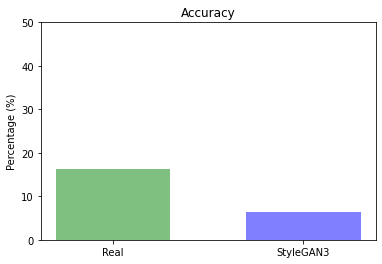

In [208]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [meanAccReal, meanAccGen]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 50)
plt.title('Accuracy')

plt.show()

# Confidence

In [215]:
mappedDF = dataframe.copy()
mappedDF['evaluation'] = mappedDF['evaluation'].map({1:1, 2:2/3, 3:1/3, 4:0, 5:1/3, 6:2/3, 7:1})
mappedDF

,evaluation,_id,type
0,0.666667,61a65b9069add03e09e1e7df,0
1,0.000000,61a65b9069add03e09e1e7df,0
2,0.333333,61a65b9069add03e09e1e7df,0
3,1.000000,61a65f2e69add03e09e1e7e1,1
4,0.000000,61a65f2e69add03e09e1e7e1,1
...,...,...,...
243,0.000000,61a8a03fa99916d2901b784b,1
244,0.333333,61a8a03fa99916d2901b784b,1
245,0.000000,61a8a03fa99916d2901b784b,1
246,0.000000,61a8a03fa99916d2901b784b,1


In [219]:
meanConfRealImages = mappedDF.loc[mappedDF['type'] == 0].groupby(['_id']).mean()
print(meanConfRealImages)
meanConfGenImages = mappedDF.loc[mappedDF['type'] == 1].groupby(['_id']).mean()
print(meanConfGenImages)

                          evaluation
_id                                 
61a65b9069add03e09e1e7df    0.333333
61a899b5a99916d2901b7813    0.333333
61a899c7a99916d2901b7814    0.166667
61a899daa99916d2901b7815    0.083333
61a899eba99916d2901b7816    0.000000
61a899ffa99916d2901b7817    0.200000
61a89a1aa99916d2901b7818    0.066667
61a89a29a99916d2901b7819    0.083333
61a89a39a99916d2901b781a    0.444444
61a89a69a99916d2901b781b    0.333333
61a89a76a99916d2901b781c    0.166667
61a89a84a99916d2901b781d    0.000000
61a89a8fa99916d2901b781e    0.166667
61a89a9da99916d2901b781f    0.055556
61a89aa7a99916d2901b7820    0.066667
61a89bbfa99916d2901b7821    0.166667
61a89bc9a99916d2901b7822    0.266667
61a89bd7a99916d2901b7823    0.166667
61a89be3a99916d2901b7824    0.200000
61a89bf9a99916d2901b7825    0.416667
61a89c05a99916d2901b7826    0.083333
61a89c12a99916d2901b7827    0.400000
61a89c1da99916d2901b7828    0.083333
61a89c2ca99916d2901b7829    0.166667
61a89c3fa99916d2901b782a    0.133333
6

In [223]:
meanConfReal = meanConfRealImages[['evaluation']].mean().mul(100)
meanConfGen = meanConfGenImages[['evaluation']].mean().mul(100)
meanConfReal = meanConfReal['evaluation']
meanConfGen = meanConfGen['evaluation']
print(meanConfReal)
print(meanConfGen)

17.611111111111114
19.351851851851848


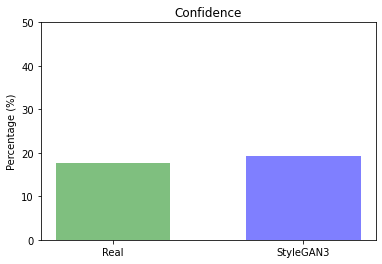

In [224]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [meanConfReal, meanConfGen]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 50)
plt.title('Confidence')

plt.show()